In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# Save the WP size data for each country

We load the WP size data from the [ONS UK data](https://www.ons.gov.uk/businessindustryandtrade/business/activitysizeandlocation/datasets/ukbusinessactivitysizeandlocation) (2017 data, table 18) and [ISTAT](http://dati-censimentoindustriaeservizi.istat.it)  use it for all the NUTS0 (countries) in Europe.

In [2]:
wpSizeBins_UK = np.array([1, 5, 10, 20, 50, 100, 250, 1000], dtype=float)
wpSizePDF_UK = np.array([2235860, 407775, 238295, 154720, 52360, 28150, 12230], dtype=float)
wpSizePDF_UK /= wpSizePDF_UK.sum()
wpSizePDF_UK /= np.diff(wpSizeBins_UK)
wpSizeCDF_UK = (wpSizePDF_UK*np.diff(wpSizeBins_UK)).cumsum()

In [3]:
wpSizeBins_IT = np.array([5, 10, 20, 50, 250, 2500], dtype=float)
wpSizeRAW_IT = np.array([1500444, 127998, 50760, 20897, 3383], dtype=float)
wpSizePDF_IT = (wpSizeRAW_IT/wpSizeRAW_IT.sum())/np.diff(wpSizeBins_IT)
wpSizeCDF_IT = (wpSizePDF_IT*np.diff(wpSizeBins_IT)).cumsum()
wpEmployedInSizeRAW_IT = np.array([7518178, 1679865, 1510258, 2021059, 3116677], dtype=float)
wpEmployedInSizePDF_IT = wpEmployedInSizeRAW_IT/wpEmployedInSizeRAW_IT.sum()/np.diff(wpSizeBins_IT)

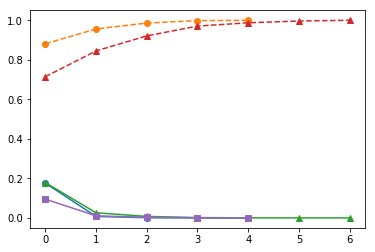

In [4]:
plt.plot(wpSizePDF_IT, "o-")
plt.plot(wpSizeCDF_IT, "o--")
plt.plot(wpSizePDF_UK, "^-")
plt.plot(wpSizeCDF_UK, "^--")
plt.plot(wpEmployedInSizePDF_IT, "s-")

In [5]:
pop = 5000000

wpSizes = []
wpEmployed = np.zeros(len(wpSizeBins_IT)-1, dtype=float)

genPop = 0
while genPop < pop:
    selectedSizeBin = np.argmax(np.random.rand() < wpSizeCDF_IT)
    size = np.random.randint(wpSizeBins_IT[selectedSizeBin], wpSizeBins_IT[selectedSizeBin+1])
    
    wpSizes.append(size)
    wpEmployed[selectedSizeBin] += size
    genPop += size

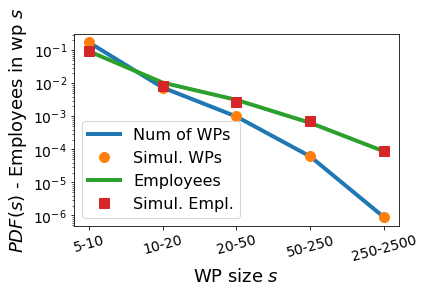

In [6]:
plt.plot(wpSizePDF_IT, "-", lw=4, label="Num of WPs")

f, b = np.histogram(wpSizes, bins=wpSizeBins_IT, density=True)
plt.plot(f, "o", ms=10, label="Simul. WPs")

plt.plot(wpEmployedInSizePDF_IT, "-", lw=4, label="Employees")
plt.plot(wpEmployed/wpEmployed.sum()/np.diff(wpSizeBins_IT), "sC3", ms=10, label="Simul. Empl.")

plt.xticks(np.arange(len(wpEmployed)),
                     ["%d-%d" % (wpSizeBins_IT[i], wpSizeBins_IT[i+1])
                                      for i in range(len(wpEmployed))],
           size=14, rotation=15)
plt.yticks(size=14)

plt.xlabel(r"WP size $s$", size=18)
plt.ylabel(r"$PDF(s)$ - Employees in wp $s$", size=18)

plt.yscale("log")

plt.legend(fontsize=16)
plt.tight_layout()
plt.savefig("figures/synPop_2011_EU_IT_wpSizeAndEmployeesDistribution.pdf", bbox_inches="tight")

In [7]:
# Load the data from first step to include all the NUTS0 codes...
df_reference = pd.read_pickle("resources/Europe/population/structure/dataframes/2011_ageBySex_PDF.pkl")
df_reference.head()

female                                                              \
              0         1         2         3         4         5         6     
GEO/AGE                                                                         
BE       0.011376  0.011295  0.011331  0.011172  0.011145  0.010847  0.010719   
BE1      0.015497  0.015116  0.014300  0.013619  0.013280  0.012825  0.012186   
BE10     0.015497  0.015116  0.014300  0.013619  0.013280  0.012825  0.012186   
BE2      0.010818  0.010664  0.010904  0.010742  0.010632  0.010317  0.010244   
BE21     0.011727  0.011400  0.011422  0.011312  0.011047  0.010749  0.010436   

                                         ...        total                      \
              7         8         9      ...          91        92        93    
GEO/AGE                                  ...                                    
BE       0.010472  0.010375  0.010591    ...     0.001199  0.000673  0.000523   
BE1      0.011503  0.011173  0.011103    ...     0.001276  0.000749  0.000623   
BE10     0.011503  0.011173  0.011103    ...     0.001276  0.000749  0.000623   
BE2      0.009921  0.009871  0.010001    ...     0.001181  0.000670  0.000510   
BE21     0.010224  0.009923  0.009976    ...     0.001165  0.000680  0.000527   

                                                                               
              94        95        96        97        98        99        100  
GEO/AGE                                                                        
BE       0.000446  0.000396  0.000336  0.000230  0.000151  0.000103  0.000148  
BE1      0.000515  0.000439  0.000433  0.000262  0.000200  0.000134  0.000208  
BE10     0.000515  0.000439  0.000433  0.000262  0.000200  0.000134  0.000208  
BE2      0.000446  0.000401  0.000323  0.000232  0.000154  0.000104  0.000146  
BE21     0.000469  0.000424  0.000314  0.000249  0.000157  0.000096  0.000154  

[5 rows x 303 columns]

In [8]:
indexes = df_reference[df_reference.index.str.len() <= 3].index

In [9]:
df_wpSize = pd.DataFrame({c: {"CDF": wpSizeCDF_IT, "PDF": wpSizePDF_IT,
                              "RAW": wpSizeRAW_IT, "BINS": wpSizeBins_IT,
                              "EMPLOYED_COUNT_RAW": wpEmployedInSizeRAW_IT,
                              "EMPLOYED_COUNT_PDF": wpEmployedInSizePDF_IT,
                             } for c in indexes})
df_wpSize = df_wpSize.transpose()
df_wpSize.head()

,BINS,CDF,EMPLOYED_COUNT_PDF,EMPLOYED_COUNT_RAW,PDF,RAW
AT,"[5.0, 10.0, 20.0, 50.0, 250.0, 2500.0]","[0.8808100114941044, 0.9559490502394508, 0.985...","[0.09489032494370675, 0.010601167976573575, 0....","[7518178.0, 1679865.0, 1510258.0, 2021059.0, 3...","[0.1761620022988209, 0.007513903874534629, 0.0...","[1500444.0, 127998.0, 50760.0, 20897.0, 3383.0]"
AT1,"[5.0, 10.0, 20.0, 50.0, 250.0, 2500.0]","[0.8808100114941044, 0.9559490502394508, 0.985...","[0.09489032494370675, 0.010601167976573575, 0....","[7518178.0, 1679865.0, 1510258.0, 2021059.0, 3...","[0.1761620022988209, 0.007513903874534629, 0.0...","[1500444.0, 127998.0, 50760.0, 20897.0, 3383.0]"
AT2,"[5.0, 10.0, 20.0, 50.0, 250.0, 2500.0]","[0.8808100114941044, 0.9559490502394508, 0.985...","[0.09489032494370675, 0.010601167976573575, 0....","[7518178.0, 1679865.0, 1510258.0, 2021059.0, 3...","[0.1761620022988209, 0.007513903874534629, 0.0...","[1500444.0, 127998.0, 50760.0, 20897.0, 3383.0]"
AT3,"[5.0, 10.0, 20.0, 50.0, 250.0, 2500.0]","[0.8808100114941044, 0.9559490502394508, 0.985...","[0.09489032494370675, 0.010601167976573575, 0....","[7518178.0, 1679865.0, 1510258.0, 2021059.0, 3...","[0.1761620022988209, 0.007513903874534629, 0.0...","[1500444.0, 127998.0, 50760.0, 20897.0, 3383.0]"
BE,"[5.0, 10.0, 20.0, 50.0, 250.0, 2500.0]","[0.8808100114941044, 0.9559490502394508, 0.985...","[0.09489032494370675, 0.010601167976573575, 0....","[7518178.0, 1679865.0, 1510258.0, 2021059.0, 3...","[0.1761620022988209, 0.007513903874534629, 0.0...","[1500444.0, 127998.0, 50760.0, 20897.0, 3383.0]"


In [26]:
df_wpSize.to_pickle("resources/Europe/population/structure/dataframes/wpSizeDistribution_NUTS1.pkl")

# Procedure trial and error

When generating the wps we encounter different problems: for example, we draw the wp size from 5 to 5000 and then we assign the available workers to it. Then we have a lot of rounding (workplaces larger than the population) and we do not reconstruct the real distribution of wp size.

That is why we have to put in place an IPF-like approach:
- collect all the most disaggregated codes belonging to the most disaggregated level of the wp size statistics;
- with the reference $P(s)$ compute the initial number of 
- while we have workers to assign cycle 


In [10]:
import h5py
import pickle

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [11]:
schoolSize = pd.read_pickle("resources/Europe/population/structure/dataframes/school_PISA_sizeDistribution_NUTS0.pkl")

In [12]:
schoolSize.head()

,BINS,CDF,PDF,RAW
AT,"[5, 25, 45, 65, 85, 105, 125, 145, 165, 185, 2...","[0.02754356379988758, 0.06339391668228093, 0.0...","[0.001377178189994379, 0.0017925176441196677, ...","[543.0, 426.0, 834.0, 336.0, 995.0, 497.0, 171..."
BE,"[5, 25, 45, 65, 85, 105, 125, 145, 165, 185, 2...","[0.0, 0.007407407407407408, 0.0333333333333333...","[0.0, 0.0003703703703703704, 0.001296296296296...","[646.0, 275.0, 555.0, 225.0, 495.0, 247.0, 113..."
BG,"[5, 25, 45, 65, 85, 105, 125, 145, 165, 185, 2...","[0.02185792349726776, 0.04918032786885246, 0.0...","[0.001092896174863388, 0.001366120218579235, 0...","[177.0, 134.0, 181.0, 221.0, 494.0, 351.0, 477..."
CZ,"[5, 25, 45, 65, 85, 105, 125, 145, 165, 185, 2...","[0.024096385542168672, 0.09638554216867469, 0....","[0.0012048192771084336, 0.0036144578313253013,...","[253.0, 203.0, 175.0, 241.0, 111.0, 246.0, 43...."
DE,"[5, 25, 45, 65, 85, 105, 125, 145, 165, 185, 2...","[0.005128205128205128, 0.015384615384615385, 0...","[0.0002564102564102564, 0.0005128205128205128,...","[321.0, 624.0, 167.0, 144.0, 337.0, 250.0, 127..."


In [14]:
# Load the data on a real population
pop_file = h5py.File("resources/Italy/synthPop_Piedimont_100pc_2011.h5", mode="r")

ag_df = pd.DataFrame(np.array(pop_file["agent"]))
wp_df = pd.DataFrame(np.array(pop_file["workplace"]))
hh_df = pd.DataFrame(np.array(pop_file["household"]))

In [33]:
row2tup = lambda r: tuple(int(r["l%d" % c]) for c in range(3))
row2tup(hh_df.iloc[0])

(0, 569, 0)

In [34]:
hh_codesTuples = set([row2tup(r) for _, r in hh_df.iterrows()])
qp_codesTuples = set([row2tup(r) for _, r in wp_df.iterrows()])

In [41]:
ag_df.head()

,id,hh,role,sex,age,edu,employed,income,wp
0,0,0,1,1,65,1,-1,0.000000,-1
1,1,1,1,1,52,0,-1,0.000000,-1
2,2,1,1,0,49,1,10,31664.328798,26314
3,3,1,0,1,7,0,1,0.000000,19
4,4,2,1,1,66,0,-1,15793.221583,-1


In [13]:
%%time
load_pickle = True

if not load_pickle:
    ag_df["hh_IDX"] = -1

    iii = -1
    hh_codesTuples = []
    for area_tuple, tmp_group in hh_df.groupby(["l%d" % c for c in range(3)]):
        # Tuple to id 
        hh_codesTuples.append(area_tuple)
        tmp_IDX = len(hh_codesTuples)-1

        tmp_hh_ids = set(tmp_group["id"])
        ag_df.at[ag_df["hh"].isin(tmp_hh_ids), "hh_IDX"] = tmp_IDX

        iii -= 1
        if iii == 0: break

    ag_df["wp_IDX"] = -1

    iii = -1
    wp_codesTuples = []
    for area_tuple, tmp_group in wp_df.groupby(["l%d" % c for c in range(3)]):
        # Tuple to id
        wp_codesTuples.append(area_tuple)
        tmp_IDX = len(wp_codesTuples) - 1

        tmp_ids = set(tmp_group["id"])
        ag_df.at[ag_df["wp"].isin(tmp_ids), "wp_IDX"] = tmp_IDX

        iii -= 1
        if iii == 0: break
    ag_df.to_pickle("resources/Italy/synthPop_Piedimont_100pc_2011_wp_hh_IDX.pkl")
    pickle.dump(hh_codesTuples, open("resources/Italy/synthPop_Piedimont_100pc_2011_hhIDX.pkl", "wb"))
    pickle.dump(wp_codesTuples, open("resources/Italy/synthPop_Piedimont_100pc_2011_wpIDX.pkl", "wb"))
else:
    ag_df = pd.read_pickle("resources/Italy/synthPop_Piedimont_100pc_2011_wp_hh_IDX.pkl")
    hh_codesTuples = pickle.load(open("resources/Italy/synthPop_Piedimont_100pc_2011_hhIDX.pkl", "rb"))
    wp_codesTuples = pickle.load(open("resources/Italy/synthPop_Piedimont_100pc_2011_wpIDX.pkl", "rb"))

CPU times: user 312 ms, sys: 1.1 s, total: 1.42 s
Wall time: 1.41 s


In [27]:
# code to work with the checkpoints
workersPerLau = pickle.load(open("checkpoint_WperLAU.pkl", "rb"))
nWorkersPerLau = pickle.load(open("checkpoint_nWRK.pkl", "rb"))
genWorkplacesPerLau = pickle.load(open("checkpoint_genWP.pkl", "rb"))

In [28]:
from synpopGenerator_tools import universityBins, universityPDF

In [29]:
empiricalPDF = {
        0: schoolSize.loc["IT"]["PDF"],
        1: schoolSize.loc["IT"]["PDF"],
        2: schoolSize.loc["IT"]["PDF"],
        3: universityPDF,
        10: df_wpSize.loc["ITC"]["PDF"],
    }
empiricalCDF = {
        0: schoolSize.loc["IT"]["CDF"],
        1: schoolSize.loc["IT"]["CDF"],
        2: schoolSize.loc["IT"]["CDF"],
        3: (universityPDF*np.diff(universityBins)).cumsum(),
        10: df_wpSize.loc["ITC"]["CDF"],
    }
empiricalBNS = {
        0: schoolSize.loc["IT"]["BINS"],
        1: schoolSize.loc["IT"]["BINS"],
        2: schoolSize.loc["IT"]["BINS"],
        3: universityBins,
        10: df_wpSize.loc["ITC"]["BINS"],
    }
empiricalPDF2 = {k: v**2. for k, v in empiricalPDF.iteritems()}

targetPDF = {k: np.ones(v.shape[0]) for k, v in empiricalPDF.iteritems()}
targetPDF_sum = {k: v.sum() for k, v in targetPDF.iteritems()}

In [30]:
# Create a pool from the checkpoint using the workplace
import synpopStructures
reload(synpopStructures)


# workersPerLau[LAU][wp_kind] = {set(ids)}

workplaces_wp = {}
workplaces = {}

wp_id_cum = 0
for wp_kind in [0,1,2,3,10]:
    if wp_kind < 0: continue
    
    nWorkers = {k: len(v[wp_kind]) for k, v in workersPerLau.iteritems() if wp_kind in v}
    workplaces[wp_kind] = {k: [] for k in nWorkers.keys()}
    workplaces_wp[wp_kind] = {k: [] for k in nWorkers.keys()}
    tmp_wpsDict = workplaces[wp_kind]
    tmp_wpsDict_wp = workplaces_wp[wp_kind]
    
    tmp_empiricalBNS = empiricalBNS[wp_kind]
    tmp_empiricalPDF = empiricalPDF[wp_kind]
    tmp_empiricalPDF2 = empiricalPDF2[wp_kind]
    tmp_targetPDF = targetPDF[wp_kind]
    tmp_targetPDF_sum = targetPDF_sum[wp_kind]
    tmp_binsDiff = np.diff(tmp_empiricalBNS)
    tmp_empiricalCDF = tmp_empiricalPDF*tmp_binsDiff
    
    tmp_wp_obj = synpopStructures.workplace(kindID=wp_kind,
                    sizePDF={"BINS": tmp_empiricalBNS, "PDF": tmp_empiricalPDF})
    
    for lau2, tmp_n in nWorkers.iteritems():
        if tmp_n == 0: continue
        tmp_lau2wpsDict = tmp_wpsDict[lau2]
        tmp_lau2wpsDict_wp = tmp_wpsDict_wp[lau2]
        tmp_n_bak = tmp_n
        while tmp_n > 0:
            tmp_wp = tmp_wp_obj.makeOne(wp_id_cum, maxSize=tmp_n)
            tmp_wpSize = tmp_wp[2]
            tmp_lau2wpsDict_wp.append(tmp_wpSize)
            tmp_n -= tmp_wpSize
        
        tmp_n = tmp_n_bak
        while tmp_n > 0:
            if tmp_n < tmp_empiricalBNS[0]:
                selected_bin = 0
                tmp_wpSize = tmp_n
            else:
                if tmp_n >= tmp_empiricalBNS[-1]:
                    max_bin = len(tmp_empiricalBNS)
                else:
                    max_bin = np.argmax(tmp_empiricalBNS > tmp_n)
                
                tmp_cdf = tmp_empiricalCDF[:max_bin]
                tmp_cdf = (tmp_cdf/tmp_cdf.sum()).cumsum()
                selected_bin = np.argmax(tmp_cdf > np.random.rand())
                low = tmp_empiricalBNS[selected_bin]
                high = max(low+1, min(tmp_empiricalBNS[selected_bin+1], tmp_n))
                distribExp = .0#.25 if wp_kind >= 10 else .0
                tmp_wpSize = 1./(np.arange(low, high)**distribExp)
                tmp_wpSize = np.cumsum(tmp_wpSize/tmp_wpSize.sum())
                tmp_wpSize = low + np.argmax(tmp_wpSize > np.random.rand())
            tmp_lau2wpsDict.append(tmp_wpSize)
            tmp_n -= tmp_wpSize
    print wp_kind

0
1
2
3
10


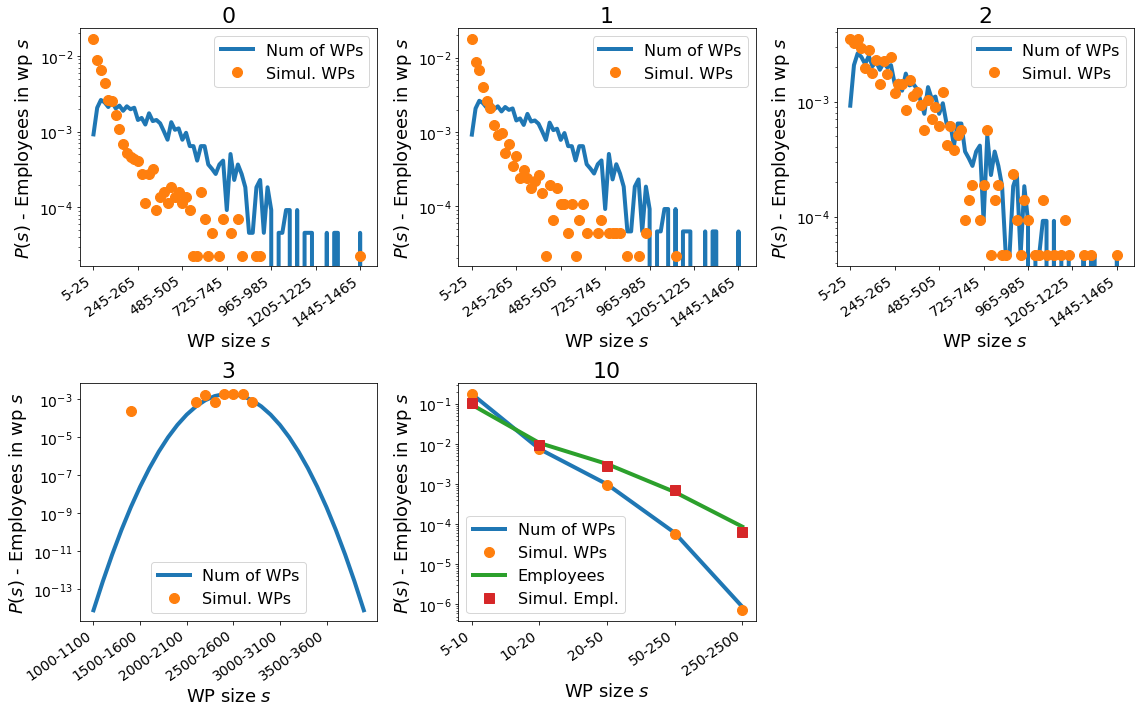

In [31]:
plt.figure(figsize=(16,10))

iii = 1
for wp_kind, wp_results in sorted(workplaces_wp.iteritems()):
    plt.subplot(2, 3, iii)
    iii += 1
    
    plt.title("%d" % wp_kind, size=22)
    
    plt.plot(empiricalPDF[wp_kind], "-", lw=4, label="Num of WPs")

    wpSizes = np.array([i for l in wp_results.values() for i in l])
    #plt.hist(wpSizes, bins=empiricalBNS)
    histDensity = True
    f, b = np.histogram(wpSizes, bins=empiricalBNS[wp_kind], density=histDensity)
    
    #f = np.array(f, dtype=float)
    plt.plot(f, "o", ms=10, label="Simul. WPs")

    if wp_kind == 10:
        plt.plot(wpEmployedInSizePDF_IT, "-", lw=4, label="Employees")
        wpEmployed = np.zeros(empiricalBNS[wp_kind].shape[0]-1)
        for bin_idx in range(len(empiricalBNS[wp_kind])-1):
            wpEmployed[bin_idx] = wpSizes[np.logical_and(
                                        wpSizes >= empiricalBNS[wp_kind][bin_idx],
                                        wpSizes < empiricalBNS[wp_kind][bin_idx+1])
                                    ].sum()

        plt.plot(wpEmployed/wpEmployed.sum()/np.diff(empiricalBNS[wp_kind]), "sC3", ms=10, label="Simul. Empl.")

    tmp_empiricalBNS = empiricalBNS[wp_kind]
    tmp_empiricalPDF = empiricalPDF[wp_kind]
    
    nBins = len(tmp_empiricalPDF)
    step = 1
    if nBins > 7:
        step = nBins/6
    locs = np.arange(0, nBins, step)
    labs = ["%d-%d" % (tmp_empiricalBNS[i], tmp_empiricalBNS[i+1])
                        for i in locs]
    plt.xticks(locs, labs, size=14, rotation=35, ha="right")
    plt.yticks(size=14)

    plt.xlabel(r"WP size $s$", size=18)
    plt.ylabel(r"$P(s)$ - Employees in wp $s$", size=18)

    plt.yscale("log")
    
    plt.legend(fontsize=16)
    plt.tight_layout()
#plt.savefig("figures/synPop_2011_EU_IT_wpSizeAndEmployeesDistribution.pdf", bbox_inches="tight")

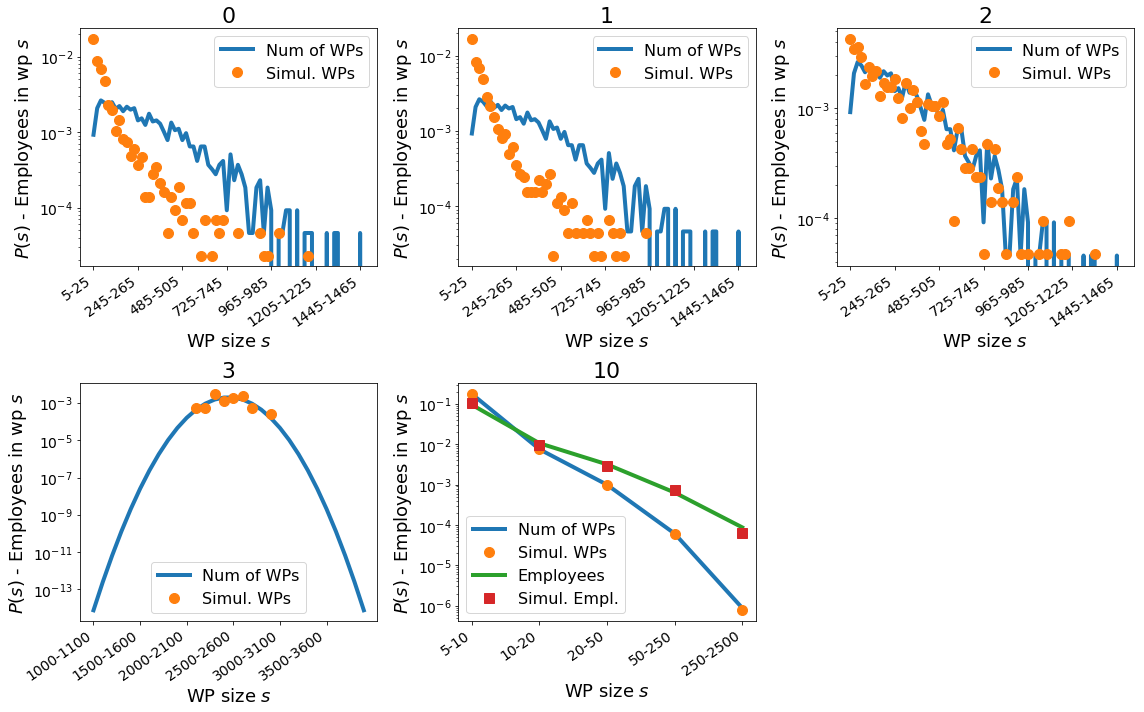

In [32]:
plt.figure(figsize=(16,10))

iii = 1
for wp_kind, wp_results in sorted(workplaces.iteritems()):
    plt.subplot(2, 3, iii)
    iii += 1
    
    plt.title("%d" % wp_kind, size=22)
    
    plt.plot(empiricalPDF[wp_kind], "-", lw=4, label="Num of WPs")

    wpSizes = np.array([i for l in wp_results.values() for i in l])
    #plt.hist(wpSizes, bins=empiricalBNS)
    histDensity = True
    f, b = np.histogram(wpSizes, bins=empiricalBNS[wp_kind], density=histDensity)
    
    #f = np.array(f, dtype=float)
    plt.plot(f, "o", ms=10, label="Simul. WPs")

    if wp_kind == 10:
        plt.plot(wpEmployedInSizePDF_IT, "-", lw=4, label="Employees")
        wpEmployed = np.zeros(empiricalBNS[wp_kind].shape[0]-1)
        for bin_idx in range(len(empiricalBNS[wp_kind])-1):
            wpEmployed[bin_idx] = wpSizes[np.logical_and(
                                        wpSizes >= empiricalBNS[wp_kind][bin_idx],
                                        wpSizes < empiricalBNS[wp_kind][bin_idx+1])
                                    ].sum()

        plt.plot(wpEmployed/wpEmployed.sum()/np.diff(empiricalBNS[wp_kind]), "sC3", ms=10, label="Simul. Empl.")

    tmp_empiricalBNS = empiricalBNS[wp_kind]
    tmp_empiricalPDF = empiricalPDF[wp_kind]
    
    nBins = len(tmp_empiricalPDF)
    step = 1
    if nBins > 7:
        step = nBins/6
    locs = np.arange(0, nBins, step)
    labs = ["%d-%d" % (tmp_empiricalBNS[i], tmp_empiricalBNS[i+1])
                        for i in locs]
    plt.xticks(locs, labs, size=14, rotation=35, ha="right")
    plt.yticks(size=14)

    plt.xlabel(r"WP size $s$", size=18)
    plt.ylabel(r"$P(s)$ - Employees in wp $s$", size=18)

    plt.yscale("log")
    
    plt.legend(fontsize=16)
    plt.tight_layout()
#plt.savefig("figures/synPop_2011_EU_IT_wpSizeAndEmployeesDistribution.pdf", bbox_inches="tight")

In [33]:
# Create a pool

workplaces = {}
for wp_kind, workers_group in ag_df.groupby("employed"):
    if wp_kind < 0: continue
        
    nWorkers = workers_group.wp_IDX.value_counts()
    workplaces[wp_kind] = {k: [] for k in nWorkers.keys()}
    tmp_wpsDict = workplaces[wp_kind]
    
    tmp_empiricalBNS = empiricalBNS[wp_kind]
    tmp_empiricalPDF = empiricalPDF[wp_kind]
    tmp_empiricalPDF2 = empiricalPDF2[wp_kind]
    tmp_targetPDF = targetPDF[wp_kind]
    tmp_targetPDF_sum = targetPDF_sum[wp_kind]
    tmp_binsDiff = np.diff(tmp_empiricalBNS)
    tmp_empiricalCDF = tmp_empiricalPDF*tmp_binsDiff
    
    done = False
    while not done:
        done = True
        for lau2, tmp_n in nWorkers.iteritems():
            if tmp_n == 0: continue
            done = False
        
            tmp_lau2wpsDict = tmp_wpsDict[lau2]
            if tmp_n < tmp_empiricalBNS[0]:
                selected_bin = 0
                tmp_wpSize = tmp_n
            else:
                if tmp_n >= tmp_empiricalBNS[-1]:
                    max_bin = len(tmp_empiricalBNS)
                else:
                    max_bin = np.argmax(tmp_empiricalBNS > tmp_n)
                IPF = wp_kind < -100
                if IPF:
                    tmp_pmf = (tmp_empiricalPDF2*(tmp_binsDiff**2.)) / (tmp_targetPDF/tmp_targetPDF_sum)
                    tmp_cdf = tmp_pmf[:max_bin]# / tmp_binsDiff[:max_bin]
                    tmp_cdf = (tmp_cdf/tmp_cdf.sum()).cumsum()
                else:
                    tmp_cdf = tmp_empiricalCDF[:max_bin]
                    tmp_cdf = (tmp_cdf/tmp_cdf.sum()).cumsum()
                selected_bin = np.argmax(tmp_cdf > np.random.rand())
                low = min(tmp_n, tmp_empiricalBNS[selected_bin])
                high = max(low+1, min(tmp_empiricalBNS[selected_bin+1], tmp_n))

                distribExp = .0#.25 if wp_kind >= 10 else .0
                tmp_wpSize = 1./(np.arange(low, high)**distribExp)
                tmp_wpSize = np.cumsum(tmp_wpSize/tmp_wpSize.sum())
                tmp_wpSize = low + np.argmax(tmp_wpSize > np.random.rand())

            tmp_lau2wpsDict.append(tmp_wpSize)
            tmp_targetPDF[selected_bin] += 1
            tmp_targetPDF_sum += 1.
            tmp_n -= tmp_wpSize
            nWorkers[lau2] -= tmp_wpSize
    print wp_kind

0
1
2
3
10


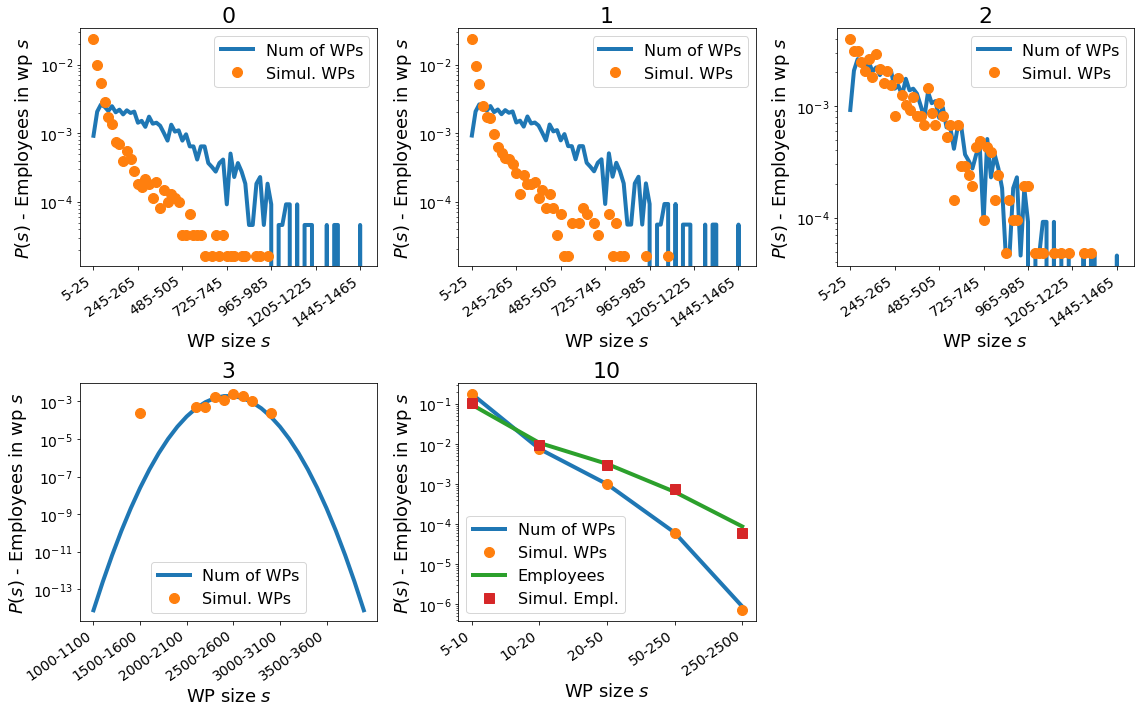

In [34]:
plt.figure(figsize=(16,10))

iii = 1
for wp_kind, wp_results in sorted(workplaces.iteritems()):
    plt.subplot(2, 3, iii)
    iii += 1
    
    plt.title("%d" % wp_kind, size=22)
    
    plt.plot(empiricalPDF[wp_kind], "-", lw=4, label="Num of WPs")

    wpSizes = np.array([i for l in wp_results.values() for i in l])
    #plt.hist(wpSizes, bins=empiricalBNS)
    histDensity = True
    f, b = np.histogram(wpSizes, bins=empiricalBNS[wp_kind], density=histDensity)
    
    #f = np.array(f, dtype=float)
    plt.plot(f, "o", ms=10, label="Simul. WPs")

    if wp_kind == 10:
        plt.plot(wpEmployedInSizePDF_IT, "-", lw=4, label="Employees")
        wpEmployed = np.zeros(empiricalBNS[wp_kind].shape[0]-1)
        for bin_idx in range(len(empiricalBNS[wp_kind])-1):
            wpEmployed[bin_idx] = wpSizes[np.logical_and(
                                        wpSizes >= empiricalBNS[wp_kind][bin_idx],
                                        wpSizes < empiricalBNS[wp_kind][bin_idx+1])
                                    ].sum()

        plt.plot(wpEmployed/wpEmployed.sum()/np.diff(empiricalBNS[wp_kind]), "sC3", ms=10, label="Simul. Empl.")

    tmp_empiricalBNS = empiricalBNS[wp_kind]
    tmp_empiricalPDF = empiricalPDF[wp_kind]
    
    nBins = len(tmp_empiricalPDF)
    step = 1
    if nBins > 7:
        step = nBins/6
    locs = np.arange(0, nBins, step)
    labs = ["%d-%d" % (tmp_empiricalBNS[i], tmp_empiricalBNS[i+1])
                        for i in locs]
    plt.xticks(locs, labs, size=14, rotation=35, ha="right")
    plt.yticks(size=14)

    plt.xlabel(r"WP size $s$", size=18)
    plt.ylabel(r"$P(s)$ - Employees in wp $s$", size=18)

    plt.yscale("log")
    
    plt.legend(fontsize=16)
    plt.tight_layout()
#plt.savefig("figures/synPop_2011_EU_IT_wpSizeAndEmployeesDistribution.pdf", bbox_inches="tight")